In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
import tensorflow as tf

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)
#load_data() 함수의 매개변수로 skip_top 매개변수에는 가장 많이 등장한 단어들 중건너뚜리 단어의 개수를 지정할 수 있음.
#예를들어 a, the, is 등과 같은 단어들은 분석에 유용하지않으므로 건너 뜀.
#num_words 매개변수는 훈련에 사용할 단어의 개수를 지정함. 실습에서는 메모리를 절약하기위해 100을 지정함.

In [9]:
print(x_test)

[list([2, 2, 2, 2, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 92, 2, 89, 2, 2, 2, 28, 2, 2, 31, 23, 27, 2, 29, 2, 2, 2, 2, 2, 2, 2, 2, 2, 46, 2, 27, 2, 2, 2, 2, 38, 32, 25, 2, 2, 2, 2, 2, 2])
 list([2, 2, 22, 2, 2, 2, 2, 2, 88, 2, 2, 23, 2, 2, 2, 2, 2, 2, 2, 55, 2, 2, 2, 2, 2, 2, 2, 2, 23, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 21, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 45, 55, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 27, 85, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 50, 2, 2, 51, 66, 2, 2, 22, 2, 2, 2, 2, 2, 34, 2, 2, 45, 2, 31, 2, 41, 2, 2, 21, 59, 2, 2, 38, 2, 2, 2, 2, 45, 2, 2, 2, 2, 2, 52, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 47, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 65, 55, 73, 2, 2, 2, 20, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 30, 2, 2, 56, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 31, 2, 27, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 22, 2, 2, 21, 45, 2, 2, 45, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 48, 25, 2, 2, 67, 35, 2, 22, 49, 2, 60, 2, 2, 2, 2, 2, 2, 58, 2

In [5]:
print(x_train_all)

[list([2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32])
 list([2, 2, 2, 2, 2, 78, 2, 2, 2, 2, 2, 2, 2, 26, 2, 2, 2, 2, 2, 2, 2, 20, 2, 2, 2, 2, 2, 2, 2, 2, 2, 21, 2, 69, 2, 2, 30, 23, 2, 2, 2, 2, 93, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 89, 29, 2, 46, 37, 2, 2, 2, 45, 43, 38, 2, 2, 2, 2, 2

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


샘플을 확인해보면 영단어가 아니라 정수가 나타난다. 이 정수들은 영단어를 고유한 정수에 일대일 대응한것으로, BoW(Bag of Word)혹은 어휘사전이라고 부른다. 훈련 세트에서 눈에띄는 숫자인 2는 어휘 사전에 없는 단어를 의미함. 가장 많이 등장하는 영단어 20개를 건너 뛰고 100개의 단어만 선택했기 때문에 사전에 없는 영단어가 많다.

In [4]:
#숫자 2는 어휘 사전에 없는 단어이다. 추가로 0과 1은 각각 패딩과 그르이 시작을 나타내는데 사용함. 이숫자들을 제외하고 훈련세트를 만든다.
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


훈련세트를 쉽게 이해할 수 있도록 영단어로 바꿔보도록하겠다. 정수를 영단어로 바꾸려면 어휘사전이 필요함.
어휘사전은 get_word_index()함수로 내려받을수 있으며, 이 함수는 영단어와 정수로 구성된 딕셔너리를 반환함.
다음은 어휘 사전을 내려받은 다음 딕셔너리의 키값을 movie로 지정하여 값을 출력한 것이다.
movie라는 영단어는 17이라는 정수에 대응 되어있음을 알수있다.

In [5]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [6]:
#훈련 세트에 있는 정수는 3이상부터 영단어를 의미하므로 3을 뺀값을 어휘 사전의 인덱스로 사용해야함.
#훈련 세트를 영단어로 변환하여 출력해 보겠습니다.

index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
#훈련 세트의 입력데이터는 넘파이 배열이 아니라 파이썬 리스트이다. 각 리뷰들의 길이가 달라 샘플의 길이가 다르기 때문이다.
#두 샘플의 길이를 직접 확인해 보겠습니다.

print(len(x_train_all[0]), len(x_train_all[1]))

59 32


첫 번째 샘플과 두 번째 샘플의 길이는 각59,32이다. 길이에 큰차이가 있다. 샘플의 길이가 다르면 모델을 제대로 훈련시킬수 없다.

In [8]:
#훈련 세트의 타깃 데이터 확인하기
#이진 분류 문제이므로 타깃 데이터는 1과 0으로 영화 리뷰가 긍정(1)인지 부정(0)인지 나타낸다.

print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [9]:
#검증 세트 준비하기.
#25,000개의 훈련세트중 5,000개만 분리하여 검증세트로 사용하겠음. 넘파이 premutation()함수를 사용하여 인덱스를 섞은후 훈련과 검증으로 분리.

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

샘플 길이 맞추기
일정 길이가 넘으면 샘플을 잘라버리고 길이가 모자라면 0으로 채운다.
샘플의 길이가 모자라면 왼쪽에 0을 추가한다. 만약 오른쪽에 추가하면 모델의 성능이 좋지 않을 것이다.


In [10]:
#텐서플로로 샘플 길이 맞추기
#텐서플로에는 샘플의 길이를 맞추는 작업을 하기위한 도구가 이미 준비되어 있다.
#최대 길이 100으로 설정하여 길이가 동일한 2개의 넘파이 배열을 만든다.

from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [11]:
#길이를 조정한 훈련 세트 크기와 샘플 확인하기.

print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


위의 결과를 보면 첫번째 샘플의 왼쪽부터 0으로 채워져있다.

In [13]:
#원-핫 인코딩
#훈련 데이터를 준비하기 위한 마지막 작업은 정수 데이터를 원-핫 인코딩 하는것이다.
#텐서플로 원-핫 인코딩 하기
# to_categorical()함수로 간단히 원-핫 인코딩 처리가능

from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [14]:
#원-핫 인코딩으로 변환된 변수 x_train_oneshot의 크기를 확인.
#20,000개의 샘플이 100차원으로 원-핫 인코딩 되었음.
print(x_train_onehot.shape)

(20000, 100, 100)


In [15]:
print(x_train_onehot.nbytes)

800000000


순환 신경만 클래스 구현하기

In [26]:
class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells #셀 개수
        self.batch_size = batch_size #배치크기
        self.w1h = None #은닉 상태에 대한 가중치
        self.w1x = None #입력에 대한 가중치
        self.b1 = None #순환층의 절편
        self.w2 = None #출력층의 가중치
        self.b2 = None #출력층의절편
        self.h = None #순환층의 활성화 출력
        self.losses = [] #훈련 손실
        self.val_losses = [] #검증 손실
        self.lr = learning_rate #학습률
        
    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))] #은닉 상태 초기화
        #배치 차원과 타임 스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)
        #순환층의 선형식 계산
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1) #활성화 함수를 적용
            self.h.append(h) #역전파를 위해 은닉 상태 저장
            z2 = np.dot(h, self.w2) + self.b2 # 출력층의 선형식을 계산
        return z2
    
    def backprop(self, x, err):
        m =len(x) #샘플 개수
        
        #출력층의 가중치와 절편에 대한 그레이디언트를 계산함
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        #배치 차원과 타임스텝 차원을 바꿈
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        #셀 직전까지 그레이디언트를 계산
        err_to_cell = np.dot(err, self.w2.T) *(1- self.h[-1] ** 2)
        #모든 타입 스텝을 거슬러 가면서 그레이디언트를 전파함
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            #이전 타임 스텝의 셀 직전까지 그레이디언트를 계산함
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /=m
        w1x_grad /=m
        b1_grad /=m
        
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        a = 1 / (1 + np.exp(-z)) #시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() #(셀개수, 셀개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() #(특성개수, 셀개수)
        self.b1 = np.zeros(self.n_cells) #은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy() #(셀개수, 클래스개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1]) #은닉층과 출력층의 가중치 초기화
        #epochs 만큼 반복
        for i in range(epochs):
            print('에포크', i, end=' ')
            #제너레이터 함수에서 반환한 미니배치를 순환함
            batch_losses= []
            for x_batch, y_batch in self.gen_batch(x,y):
                print('.', end=' ')
                a = self.training(x_batch, y_batch)
                #안전한 로그 계산을 위해 클리핑 함
                a = np.clip(a, 1e-10, 1-1e-10)
                #로그손실과 규제 손실을 더하여 리스트에 추가함
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            #검증세트에 대한 손실 계산
            self.update_val_loss(x_val,y_val)
            
    
    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니 배치횟수
        if length % self.batch_size:
            bins += 1
        indexes = np.random.permutation(np.arange(len(x))) #인덱스를 섞는다
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i +1)
            yield x[start:end], y[start:end] # batch_size만큼 슬라이싱하여 반환함
            
    
    def training(self, x, y):
        m = len(x) #샘플 개수 저장
        z = self.forpass(x) # 정방향 계산 수행
        a = self.sigmoid(z) # 활성화 함수 적용
        err = -(y -a) #오차 계산
        #오차를 역전파하여 그레이디언트를 계산
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        #셀의 가중치, 절편 업데이트
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        #출력층의 가중치, 절편 업데이트
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def predict(self, x):
        z = self.forpass(x) # 정방향 계산 수행
        return z > 0  #스텝 함수 적용
    
    
    def score(self, x, y):
        #예측과 타깃 열 벡터를 비교하여 True의 비율 반환
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val) #정방향 계산 수행
        a = self.sigmoid(z) #활성화 함수 적용
        a = np.clip(a, 1e-10, 1-1e-10) #출력값 클리핑
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)
            

셀 개수 32개, 배치크기 32개, 학습률 0.01, 에포크 횟수 20을 사용. <br> 이런 값을 포함해 TBPTT를 위한 타임 스텝 횟수는 모두 하이퍼 파라미터 이다.

In [27]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

에포크 12 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

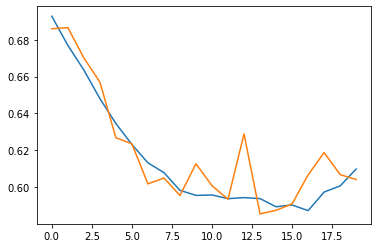

In [28]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [31]:
rn.score(x_val_onehot, y_val)

0.6768

# 텐서플로로 순환 신경망 만들기 

텐서플로에서 가장 기본적인 순환층은 SImpleRNN클래스이다.<br>
이절에서 파이썬 클래스로 만들었던것과 동일한 신경망을 SimpleRNN클래스를 사용해 만들어보겠다.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [33]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 8s 12ms/step - loss: 0.7057 - accuracy: 0.5074 - val_loss: 0.6978 - val_accuracy: 0.5176
Epoch 2/20
625/625 [==============================] - 7s 12ms/step - loss: 0.6908 - accuracy: 0.5373 - val_loss: 0.6849 - val_accuracy: 0.5542
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 0.6731 - accuracy: 0.5824 - val_loss: 0.6595 - val_accuracy: 0.6158
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6500 - accuracy: 0.6211 - val_loss: 0.6290 - val_accuracy: 0.6518
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6309 - accuracy: 0.6493 - val_loss: 0.6138 - val_accuracy: 0.6604
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6170 - accuracy: 0.6629 - val_loss: 0.6170 - val_accuracy: 0.6556
Epoch 7/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6075 - accuracy: 0.6718 - val_loss: 0.6063 - val_accuracy: 0.6686

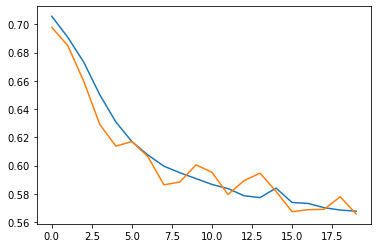

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

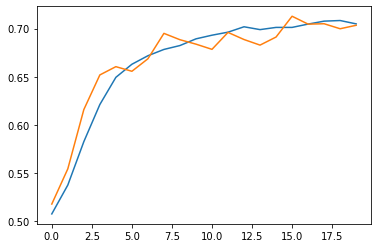

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [37]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

In [38]:
print(accuracy)

0.7034000158309937


In [39]:
from tensorflow.keras.layers import Embedding

In [40]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [41]:
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [43]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))
model_ebd.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6470 - accuracy: 0.6058 - val_loss: 0.4983 - val_accuracy: 0.7614
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4501 - accuracy: 0.7988 - val_loss: 0.4547 - val_accuracy: 0.7932
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3804 - accuracy: 0.8369 - val_loss: 0.4275 - val_accuracy: 0.8092
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3411 - accuracy: 0.8576 - val_loss: 0.4400 - val_accuracy: 0.7986
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3066 - accuracy: 0.8791 - val_loss: 0.4330 - val_accuracy: 0.8178
Epoch 6/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2725 - accuracy: 0.8963 - val_loss: 0.4794 - val_accuracy: 0.8040
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2506 - accuracy: 0.9042 - val_loss: 0.4806 - val_accuracy: 0.8170

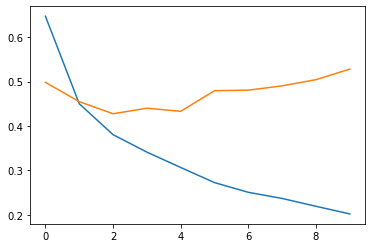

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

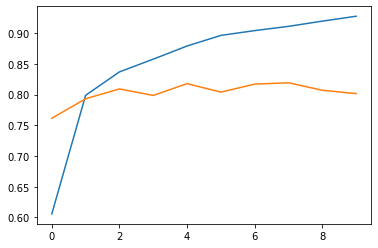

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [50]:
loss,accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8015999794006348


# LSTM순환 신경망을 만들고텍스트 분류

In [51]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 12s 19ms/step - loss: 0.4734 - accuracy: 0.7740 - val_loss: 0.3918 - val_accuracy: 0.8286
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3451 - accuracy: 0.8551 - val_loss: 0.3569 - val_accuracy: 0.8434
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3177 - accuracy: 0.8670 - val_loss: 0.3736 - val_accuracy: 0.8342
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3007 - accuracy: 0.8730 - val_loss: 0.3553 - val_accuracy: 0.8406
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2867 - accuracy: 0.8795 - val_loss: 0.3631 - val_accuracy: 0.8388
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2757 - accuracy: 0.8864 - val_loss: 0.3801 - val_accuracy: 0.8338
Epoch 7/10
625/625 [==============================] - 12s 18ms/step - loss: 0.2673 - accuracy: 0.8886 - val_loss: 0.3739 - val_accuracy:

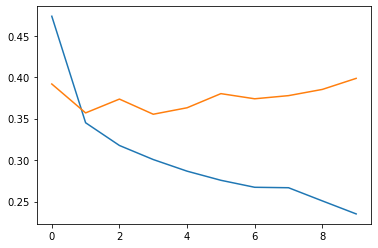

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

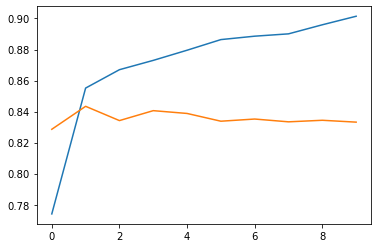

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [55]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8331999778747559
